<a href="https://colab.research.google.com/github/JennaKvasnovsky/Fall2023/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 147243108.09it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 33472145.30it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41253192.14it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5207908.36it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

In [ ]:
x = X[3,0,:,:]

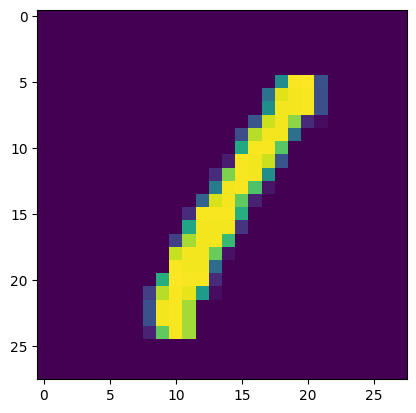

In [ ]:
plt.imshow(x)

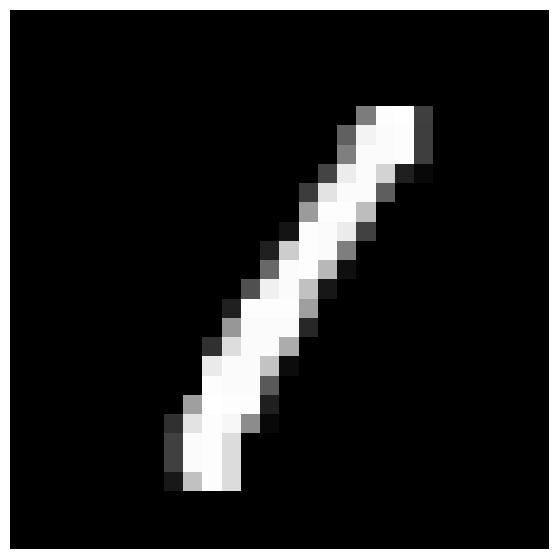

In [ ]:
plot(x)

In [ ]:
x.shape

(28, 28)

In [ ]:
x.shape[0]

28

In [ ]:
x.shape[1]

28

In [ ]:
x = x.reshape(x.shape[0]*x.shape[1],1)

In [ ]:
x.shape

(784, 1)

In [ ]:
x = x.reshape(28,28)

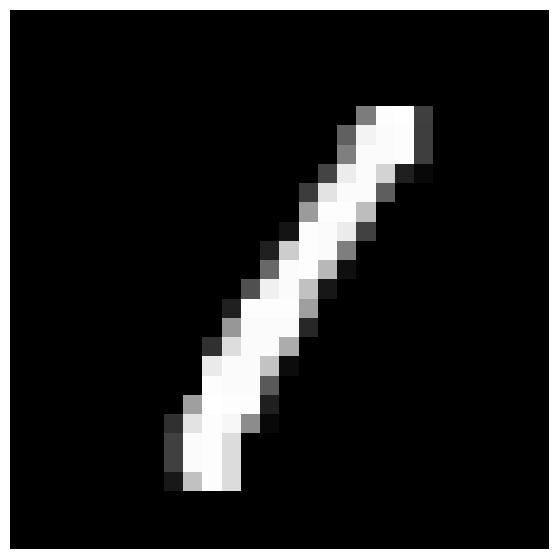

In [ ]:
plot(x)

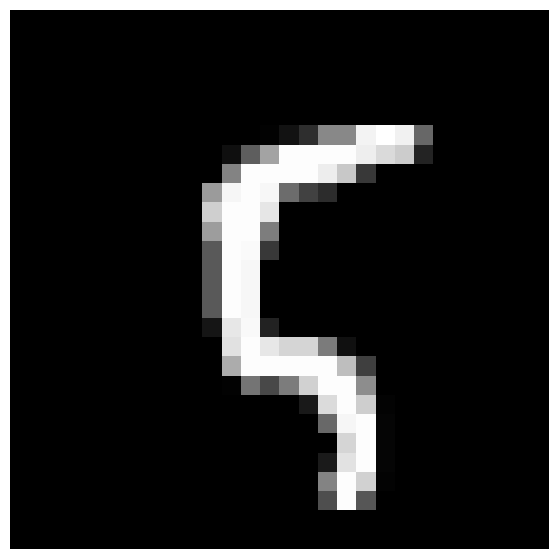

In [ ]:
plot(X[100,0,:,:])

In [ ]:
Y[120]

2

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

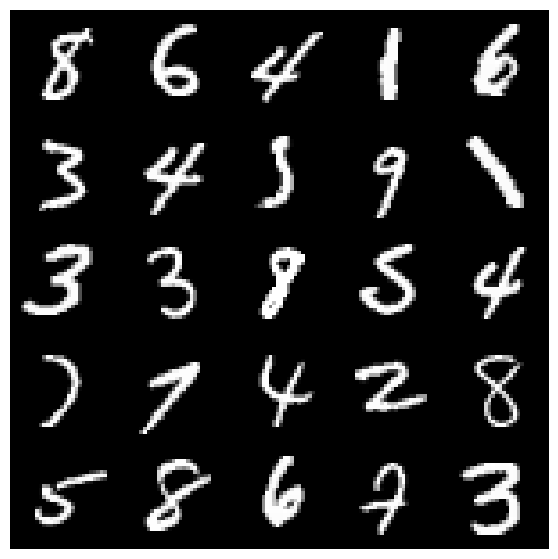

In [ ]:
montage_plot(X[125:150,0,:,:])

In [ ]:
X.shape[1]

1

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

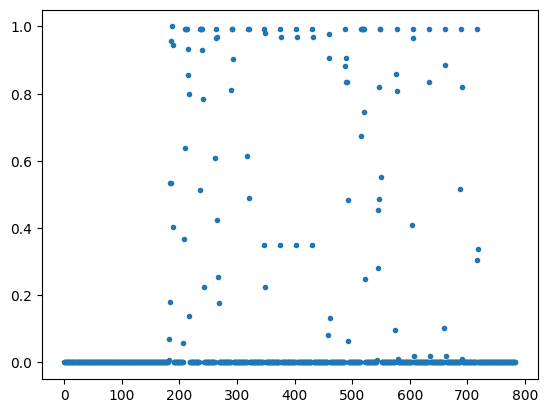

In [ ]:
plt.plot(X[100],'.')

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

<ipython-input-3-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


In [ ]:
###################################################

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
X = X.T

In [ ]:
X.shape

torch.Size([784, 60000])

In [ ]:
x = X[:,0:64]

In [ ]:
Y[0:64]

tensor([5., 0., 4., 1., 9., 2., 1., 3., 1., 4., 3., 5., 3., 6., 1., 7., 2., 8.,
        6., 9., 4., 0., 9., 1., 1., 2., 4., 3., 2., 7., 3., 8., 6., 9., 0., 5.,
        6., 0., 7., 6., 1., 8., 7., 9., 3., 9., 8., 5., 9., 3., 3., 0., 7., 4.,
        9., 8., 0., 9., 4., 1., 4., 4., 6., 0.], device='cuda:0')

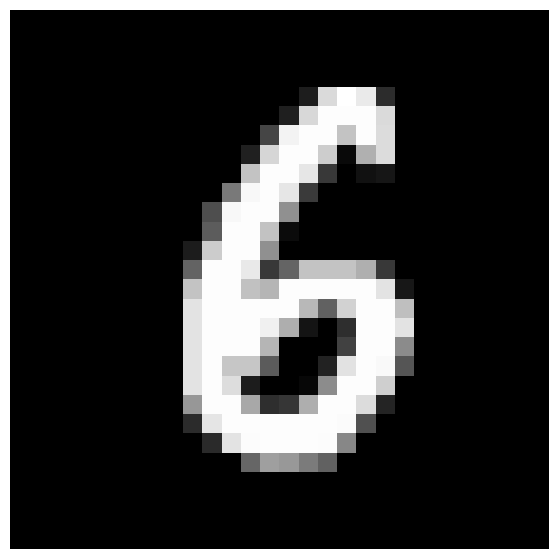

In [ ]:
plot(x[:,62].reshape(28,28))

In [ ]:
M = GPU(np.random.rand(10,784))

In [ ]:
M.shape,x.shape

(torch.Size([10, 784]), torch.Size([784, 64]))

In [ ]:
#M@x

In [ ]:
y = M@x

In [ ]:
y.shape

torch.Size([10, 64])

In [ ]:
torch.max(y,0)

torch.return_types.max(
values=tensor([57.8822, 66.1572, 41.7054, 36.9024, 50.4140, 62.5300, 37.4586, 72.7023,
        25.0416, 46.6359, 58.0633, 29.4856, 71.7031, 60.7168, 24.7614, 52.5412,
        51.4592, 56.8233, 29.7063, 38.8253, 71.0997, 75.7450, 36.2285, 35.2304,
        50.8219, 85.7513, 28.7340, 92.2339, 85.3663, 35.3726, 53.1592, 68.1660,
        38.6603, 44.7216, 75.5154, 34.1373, 67.2675, 75.7203, 46.8816, 57.7967,
        30.2621, 57.2824, 28.4077, 38.0878, 34.9773, 50.6909, 48.0030, 49.5364,
        35.5432, 67.1850, 39.0880, 96.4034, 56.3996, 36.7963, 49.9645, 65.4546,
        86.6446, 42.1887, 68.7573, 35.0293, 62.5580, 38.1140, 62.6001, 93.1392],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([7, 1, 9, 7, 1, 1, 1, 8, 1, 6, 1, 3, 6, 5, 4, 1, 1, 1, 5, 7, 9, 1, 7, 7,
        1, 8, 1, 9, 4, 5, 4, 1, 5, 7, 7, 1, 1, 5, 7, 5, 1, 7, 1, 7, 7, 1, 1, 1,
        8, 1, 7, 1, 7, 7, 4, 5, 1, 7, 1, 7, 6, 5, 1, 1], device='cuda:0'))

In [ ]:
y = torch.argmax(y,0)

In [ ]:
y

tensor([7, 1, 9, 7, 1, 1, 1, 8, 1, 6, 1, 3, 6, 5, 4, 1, 1, 1, 5, 7, 9, 1, 7, 7,
        1, 8, 1, 9, 4, 5, 4, 1, 5, 7, 7, 1, 1, 5, 7, 5, 1, 7, 1, 7, 7, 1, 1, 1,
        8, 1, 7, 1, 7, 7, 4, 5, 1, 7, 1, 7, 6, 5, 1, 1], device='cuda:0')

In [ ]:
Y[0:64]

tensor([5., 0., 4., 1., 9., 2., 1., 3., 1., 4., 3., 5., 3., 6., 1., 7., 2., 8.,
        6., 9., 4., 0., 9., 1., 1., 2., 4., 3., 2., 7., 3., 8., 6., 9., 0., 5.,
        6., 0., 7., 6., 1., 8., 7., 9., 3., 9., 8., 5., 9., 3., 3., 0., 7., 4.,
        9., 8., 0., 9., 4., 1., 4., 4., 6., 0.], device='cuda:0')

In [ ]:
y == Y[0:64]

tensor([False, False, False, False, False, False,  True, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
         True, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False], device='cuda:0')

In [ ]:
torch.sum((y == Y[0:64]))

tensor(6, device='cuda:0')

In [ ]:
torch.sum((y == Y[0:64]))/64

tensor(0.0938, device='cuda:0')

In [ ]:
batch_size = 64

M = GPU(np.random.rand(10,784))

y = M@x

y = torch.argmax(y,0)

torch.sum((y == Y[0:batch_size]))/batch_size

tensor(0.0781, device='cuda:0')

In [ ]:
M_Best = 0
Score_Best = 0

for i in range(100000):

    M_new = GPU(np.random.rand(10,784))

    y = M_new@x

    y = torch.argmax(y,0)

    Score = (torch.sum((y == Y[0:batch_size]))/batch_size).item()

    if Score > Score_Best:

        Score_Best = Score
        M_Best = M_new

        print(i,Score_Best)



In [ ]:
#37

In [ ]:
plot(GPU(np.random.randn(10,784)))

In [ ]:
# Random Walk

In [ ]:
import torch
import numpy as np
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [ ]:
def plot(x,title=None):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.title(title)
    plt.show()

In [ ]:
##MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

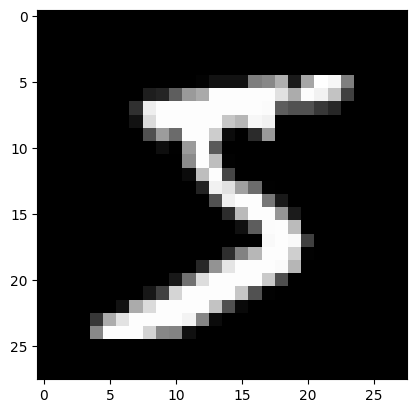

In [ ]:
plt.imshow(X[0,0,:,:],cmap='gray')

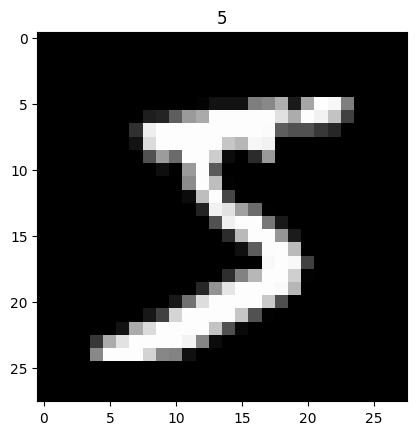

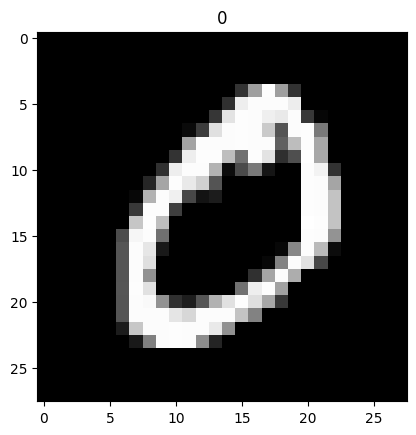

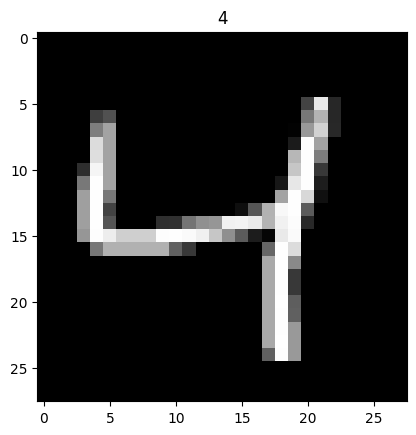

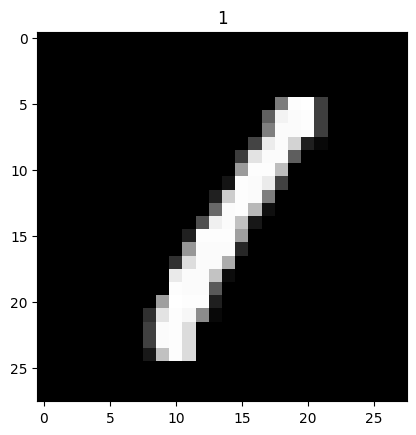

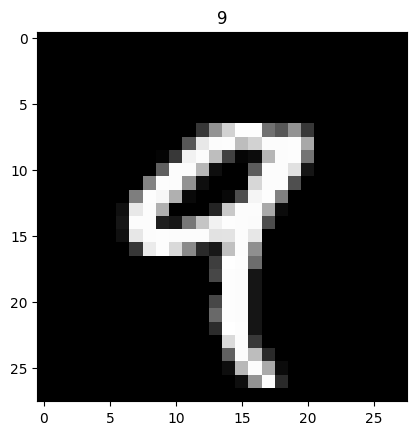

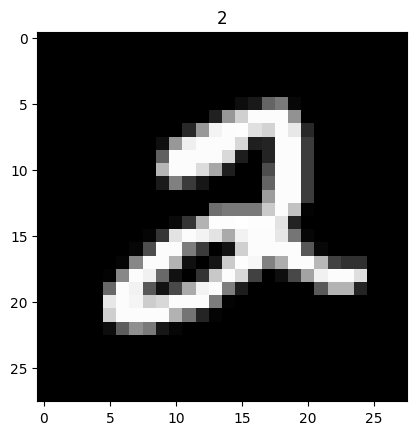

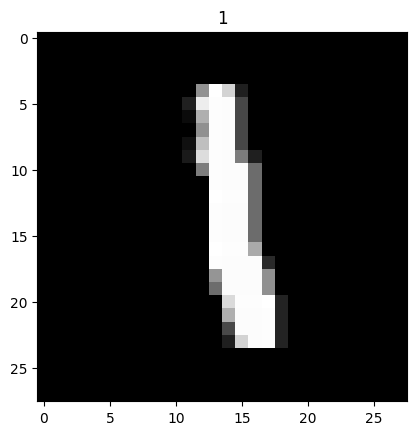

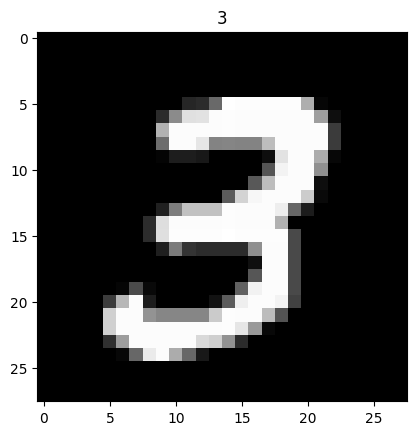

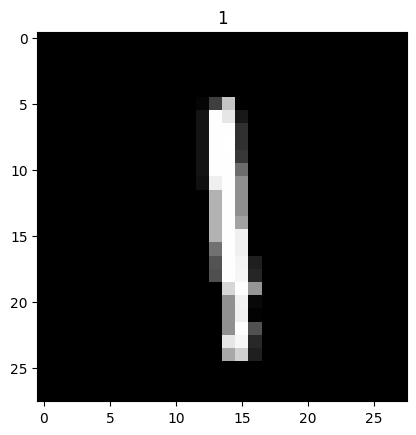

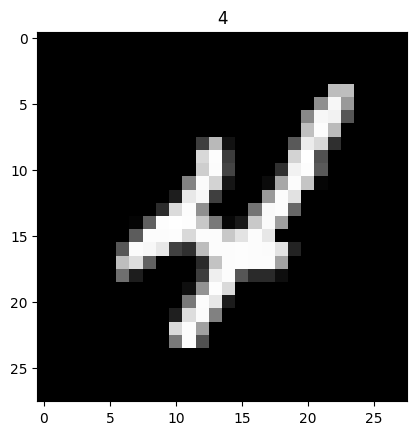

In [ ]:

for i in range(10):
    plt.imshow(X[i,0,:,:],cmap='gray')
    plt.title(str(Y[i]))
    plt.show()

In [ ]:
Y[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [ ]:
X[0,0,:,:].shape

(28, 28)

In [ ]:
x = X[0,0,:,:].flatten()

In [ ]:
x.shape

(784,)

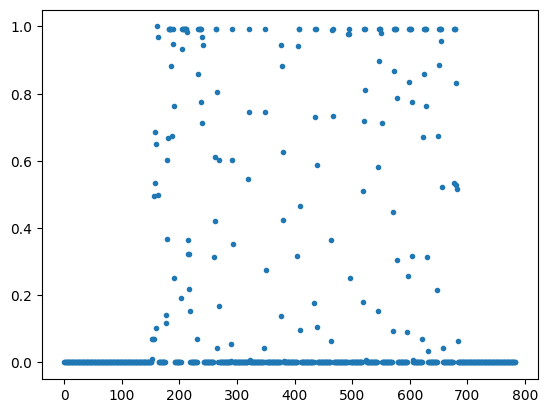

In [ ]:
plt.plot(x,'.')

In [ ]:
Y[0]

5

In [ ]:
x = x[:,None]

In [ ]:
x.shape

(784, 1)

In [ ]:
m = np.random.standard_normal((10,784))

In [ ]:
m.shape,x.shape

((10, 784), (784, 1))

In [ ]:
y = m@x # @ mean matmul

In [ ]:
y = np.matmul(m,x)

In [ ]:
y.shape

(10, 1)

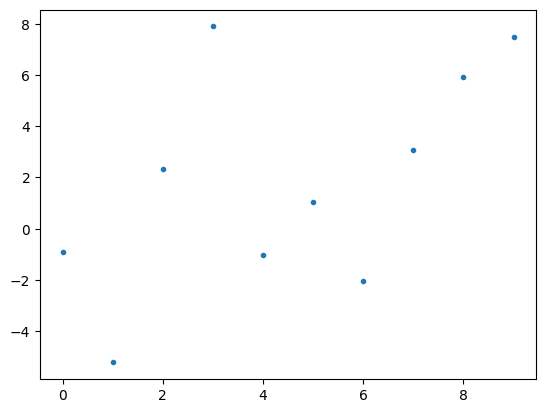

In [ ]:
plt.plot(y,'.')

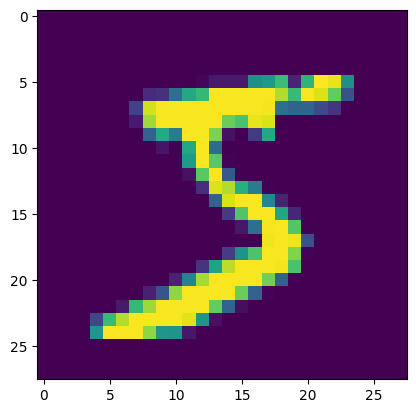

In [ ]:
plt.imshow(x.reshape(28,28))

In [ ]:
X.shape

(60000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X.shape[2]*X.shape[3]

784

In [ ]:
X = np.reshape(X, (X.shape[0],X.shape[2]*X.shape[3]))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[2]*X_test.shape[3]))

In [ ]:
X.shape

(60000, 784)

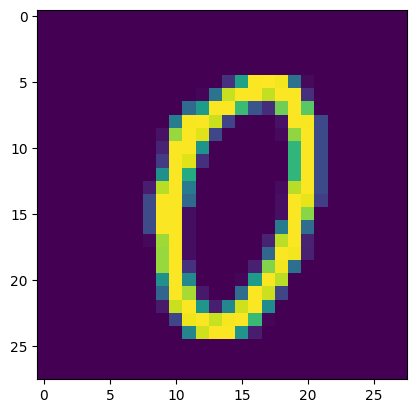

In [ ]:
plt.imshow(X[1000,:].reshape(28,28))

In [ ]:
Y[1000]

0

In [ ]:
x = X[0:2,:]

In [ ]:
x.shape

(2, 784)

In [ ]:
x = x.T

In [ ]:
m.shape,x.shape

((10, 784), (784, 2))

In [ ]:
y = m@x

In [ ]:
y

array([[ -0.9105296 ,  -5.50928249],
       [ -5.22222019,  -7.21330022],
       [  2.31523227,  10.05464309],
       [  7.89373516,  17.9971876 ],
       [ -1.02507131,   0.37528274],
       [  1.02639113,   0.71403267],
       [ -2.02521338, -13.72686209],
       [  3.05499723, -13.50109948],
       [  5.91780623,  -1.85465694],
       [  7.49538488,  12.73529809]])

In [ ]:
np.max(y, axis=0)

array([ 7.89373516, 17.9971876 ])

In [ ]:
y = np.argmax(y, axis=0)

In [ ]:
Y[0:2]

array([5, 0])

In [ ]:
y_ans = Y[0:2]

In [ ]:
y_ans

array([5, 0])

In [ ]:
y

array([3, 3])

In [ ]:
np.sum((y == y_ans))/len(y)

0.0

In [ ]:
X.shape

(60000, 784)

In [ ]:
X = X.T

In [ ]:
X_test = X_test.T

In [ ]:
m.shape,X.shape

((10, 784), (784, 60000))

In [ ]:
y = m@X

In [ ]:
y.shape

(10, 60000)

In [ ]:
y = np.argmax(y, axis=0)

In [ ]:
y_ans = Y

In [ ]:
acc = np.sum(y == y_ans)/len(Y)

In [ ]:
acc

0.10045

In [ ]:
m = np.random.standard_normal((10,784))

y = m@X

y = np.argmax(y, axis=0)

acc = np.sum(y == y_ans)/len(Y)

print(acc)

0.08928333333333334


In [ ]:
m_best = 0
acc_best = 0

for i in range(1000):

    m = 0.1*np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == y_ans)/len(Y)


    if acc > acc_best:
        print(acc)
        m_best = m
        acc_best = acc

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
# def scale(img):
#     img_min = torch.min(img)
#     img_max = torch.max(img)
#     scaled = (img - img_min) / (img_max - img_min) * 1.0
#     return scaled

In [ ]:
# X = scale(X)
# X_test = scale(X_test)

In [ ]:
m_best = 0
acc_best = 0

for i in range(100000):

    step = 0.0000000001

    m_random = GPU_data(np.random.randn(10,784))

    m = m_best  + step*m_random

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

0.10636666417121887
0.15951666235923767
0.16574999690055847
0.16588333249092102
0.18708333373069763
0.19968333840370178
0.20621666312217712
0.2089499980211258
0.22374999523162842
0.22633333504199982
0.23253333568572998
0.2331833392381668
0.2345166653394699
0.24006666243076324
0.24593333899974823
0.2551499903202057
0.25868332386016846
0.2610166668891907
0.2728666663169861
0.28191667795181274
0.29021668434143066
0.3025500178337097
0.3033166825771332
0.30709999799728394
0.3097666800022125
0.3204500079154968
0.32481667399406433
0.3259333372116089
0.33756667375564575
0.34983333945274353
0.35304999351501465
0.3530833423137665
0.35350000858306885
0.35553333163261414
0.3691999912261963
0.37023332715034485
0.3710666596889496
0.3730500042438507
0.3778333365917206
0.3779500126838684
0.3799000084400177
0.3839000165462494
0.38545000553131104
0.3956499993801117
0.3960166573524475
0.3963833451271057
0.39928334951400757
0.4020833373069763
0.4052833318710327
0.41431668400764465
0.41831666231155396
0.42

In [ ]:
M = GPU_data(np.random.random((100,10,784)))
M.shape,X.shape
(M@X).shape
(torch.argmax((M@X), axis=1) == Y).shape
Y.shape
y = torch.argmax((M@X), axis=1)
score = ((y == Y).sum(1)/len(Y))
s = torch.argsort(score,descending=True)
score[s]

tensor([0.2088, 0.1990, 0.1838, 0.1740, 0.1694, 0.1585, 0.1551, 0.1472, 0.1465,
        0.1442, 0.1424, 0.1374, 0.1342, 0.1328, 0.1320, 0.1316, 0.1311, 0.1298,
        0.1297, 0.1285, 0.1262, 0.1256, 0.1215, 0.1212, 0.1182, 0.1178, 0.1165,
        0.1116, 0.1092, 0.1090, 0.1066, 0.1057, 0.1055, 0.1048, 0.1046, 0.1037,
        0.1027, 0.1022, 0.1010, 0.0999, 0.0988, 0.0976, 0.0952, 0.0948, 0.0946,
        0.0945, 0.0945, 0.0936, 0.0932, 0.0932, 0.0918, 0.0918, 0.0916, 0.0915,
        0.0910, 0.0909, 0.0904, 0.0897, 0.0895, 0.0895, 0.0893, 0.0892, 0.0885,
        0.0882, 0.0880, 0.0853, 0.0835, 0.0834, 0.0833, 0.0826, 0.0816, 0.0808,
        0.0803, 0.0802, 0.0802, 0.0802, 0.0789, 0.0783, 0.0773, 0.0768, 0.0754,
        0.0744, 0.0731, 0.0684, 0.0682, 0.0677, 0.0672, 0.0661, 0.0656, 0.0610,
        0.0605, 0.0589, 0.0586, 0.0567, 0.0566, 0.0542, 0.0529, 0.0482, 0.0479,
        0.0448], device='cuda:0')

In [ ]:
N = 100
M = GPU_data(np.random.rand(N,10,784))

m_best = 0
acc_best = 0

step = 0.00000000001

for i in range(1000000):

    y = torch.argmax((M@X), axis=1)
    score = ((y == Y).sum(1)/len(Y))
    s = torch.argsort(score,descending=True)
    M = M[s]

    M[N//2:] = 0
    M[1:N//2] = M[0]
    M[1:] += step*GPU_data(np.random.rand(N-1,10,784))


    acc = score[s][0].item()

    if acc > acc_best:

        m_best = M[0]
        acc_best = acc

        print(i,acc)

In [ ]:
y_test = torch.argmax((M@X_test), axis=1)
score = ((y_test == Y_test).sum(1)/len(Y_test))
s = torch.argsort(score,descending=True)
acc_test = score[s][0].item()

In [ ]:
X_test.shape

torch.Size([784, 10000])

In [ ]:
acc_test

0.7858999967575073

In [ ]:
y_test[0]

tensor([7, 2, 1,  ..., 4, 8, 6], device='cuda:0')

In [ ]:
Y_test

tensor([7., 2., 1.,  ..., 4., 5., 6.], device='cuda:0')

In [ ]:
for i in range(10):

    guess = y_test[0,i].item()
    answer = int(Y_test[i])

    title = f"Guess: {guess}   ---   Actual: {answer}"
    plot(X_test[:,i].reshape(28,28),title)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO

def plot(x, title=None):
    if type(x) == torch.Tensor:
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap='gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.title(title)

# Convert the matplotlib plot to a base64 encoded image
def plot_to_base64():
    buf = BytesIO()
    plt.savefig(buf, format="png", bbox_inches='tight')
    plt.close()
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Generate the HTML content
html_content = "<html><body>"

for i in range(10):

    guess = y_test[0, i].item()
    answer = int(Y_test[i])

    title = f"Guess: {guess}   ---   Actual: {answer}"
    plot(X_test[:,i].reshape(28,28),title)
    img_b64 = plot_to_base64()


    html_content += f"<h3>{title}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{title}" />'


html_content += "</body></html>"


# Write the HTML content to a file
print(html_content, file=open("output.html",'w'))


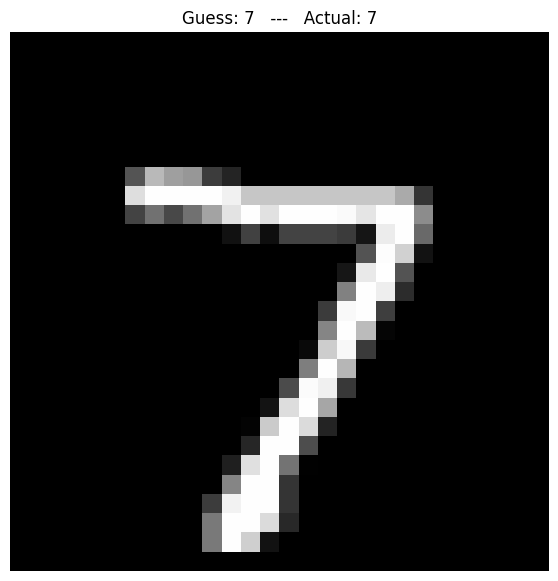
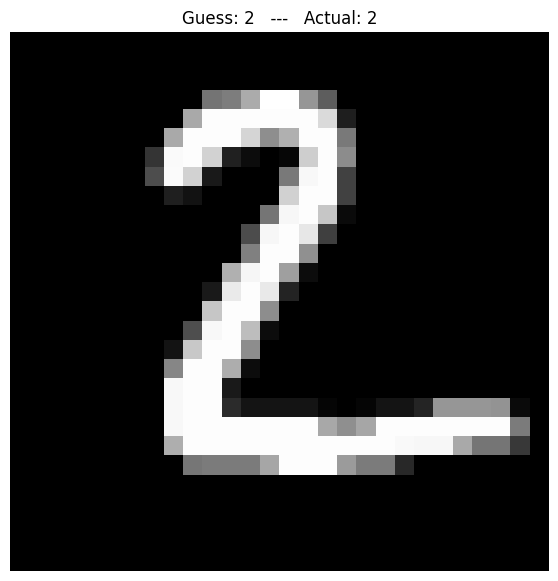
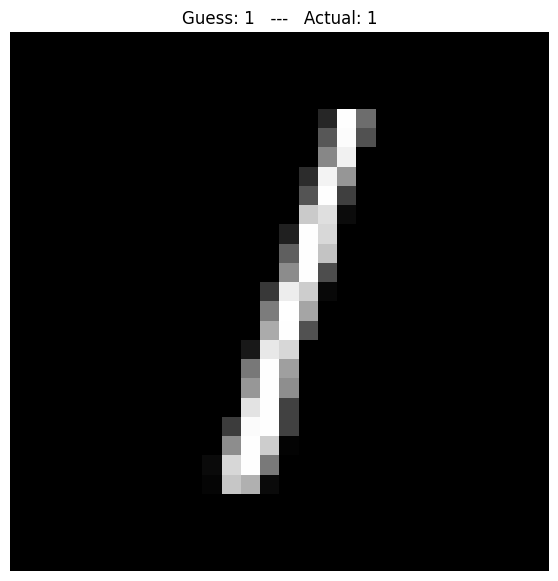
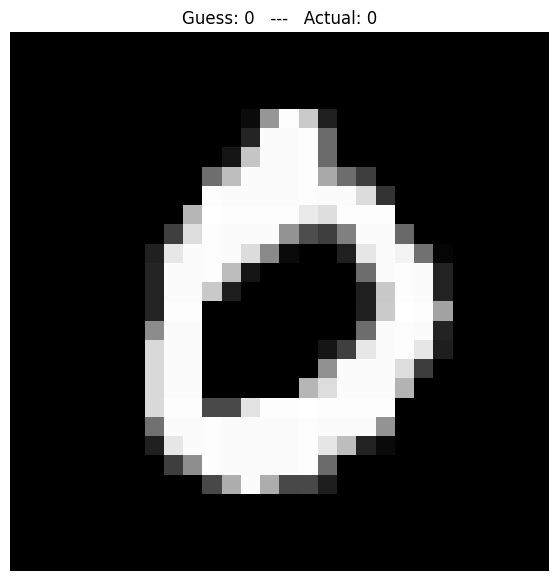
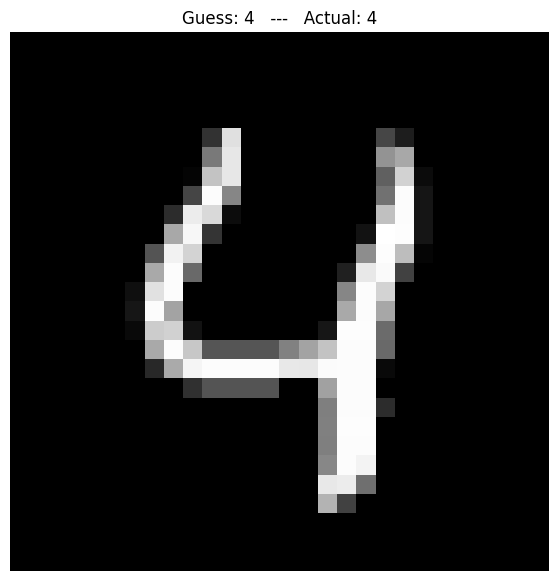
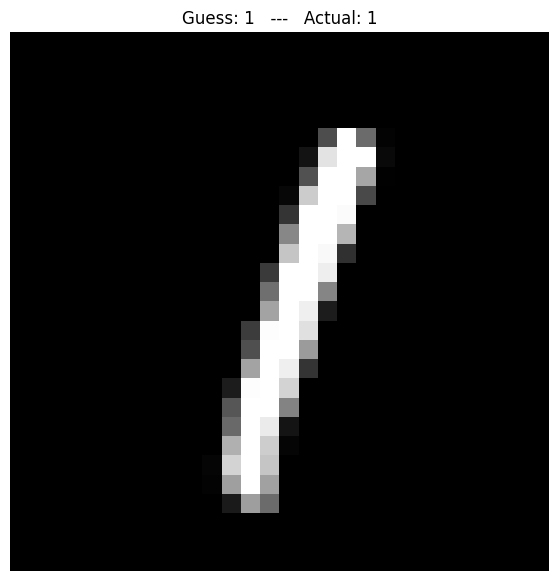
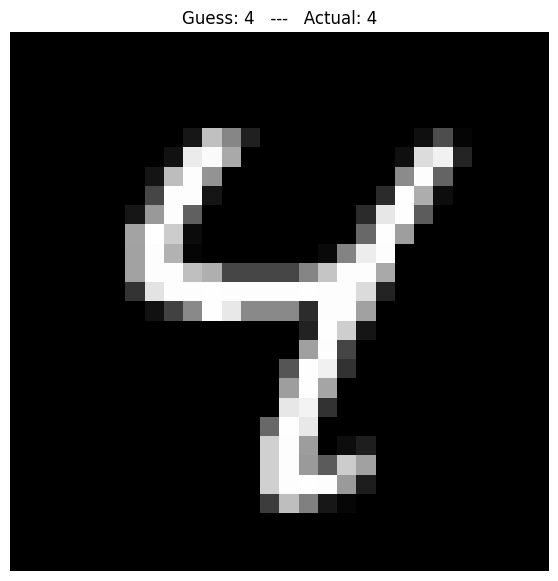
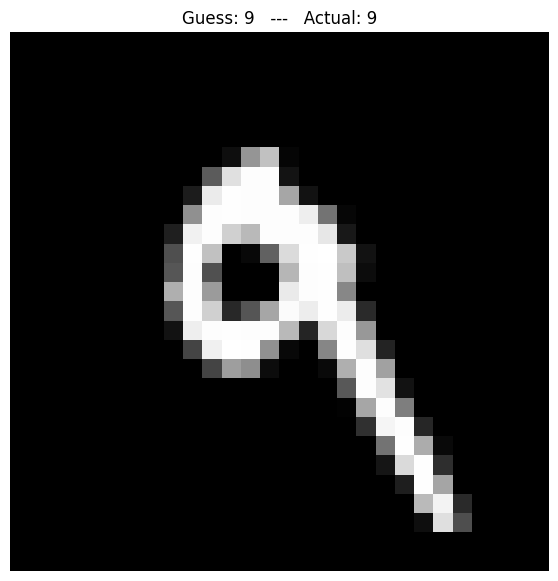
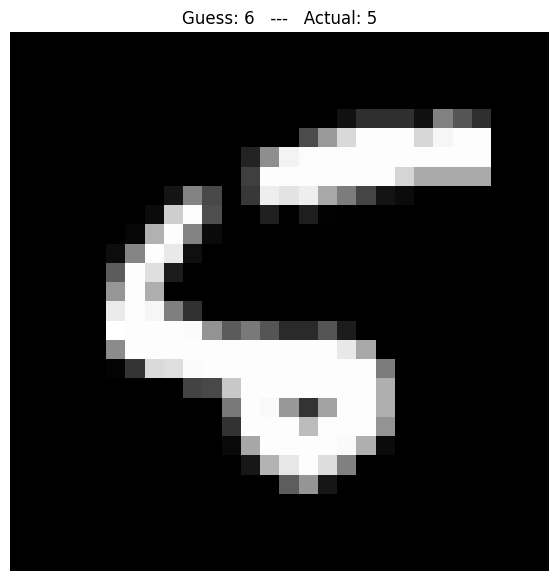
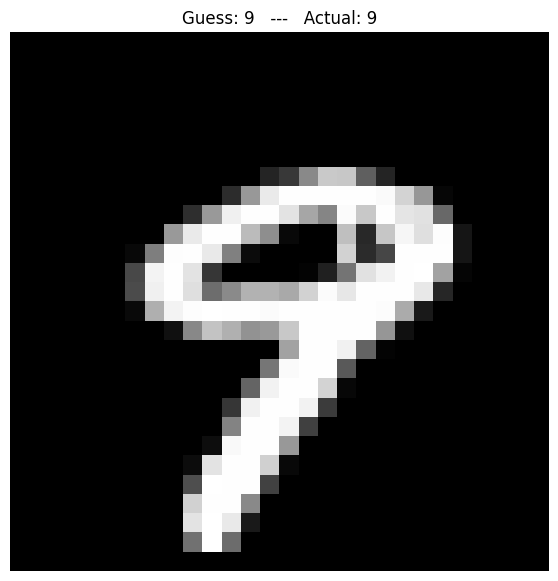

In [ ]:
import IPython
IPython.display.HTML(filename='output.html')